# PISA with Q version which evaluated individually

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pip install pyreadstat

Note: you may need to restart the kernel to use updated packages.


## Data preprocessing

In [3]:
raw_df = pd.read_spss("CY07_MSU_STU_COG_testlet.sav")

In [7]:
print(raw_df["CM033Q01S"].count())
print(raw_df["CM033Q01S"].size)

816
6650


In [4]:
fil1 = raw_df.iloc[:, 13:65]
print(fil1.shape)
#print(raw_df.iloc[0, 13:65])

(6650, 52)


In [5]:
fil2 = fil1.replace(['Full credit', '1 - Full credit', '2 - Full credit', 'No credit', '0 - No credit'], [1, 1, 1, 0, 0])
#print(fil2)

In [6]:
fil3 = fil2.drop('CM955Q03S', axis=1)
fil4 = fil3.dropna(how='all')
#print(fil4)

In [7]:
stud_AR = fil4.mean(axis=1)
prob_AR = fil4.mean(axis=0)
print("Each student's Answer Rates: ", stud_AR)
print("Answer Rates for each Items: ", prob_AR)

Each student's Answer Rates:  0       0.812500
3       0.687500
5       0.647059
6       0.555556
7       0.733333
          ...   
6642    0.625000
6646    0.333333
6647    0.823529
6648    0.272727
6649    0.470588
Length: 2727, dtype: float64
Answer Rates for each Items:  CM033Q01S    0.817402
CM474Q01S    0.783784
CM155Q01S    0.794776
CM155Q04S    0.565594
CM411Q01S    0.564557
CM411Q02S    0.523632
CM803Q01S    0.340050
CM442Q02S    0.440568
CM034Q01S    0.441250
CM305Q01S    0.427689
CM496Q01S    0.533742
CM496Q02S    0.760652
CM423Q01S    0.818627
CM192Q01S    0.527881
CM603Q01S    0.350311
CM571Q01S    0.530075
CM564Q01S    0.613776
CM564Q02S    0.466830
CM447Q01S    0.853301
CM273Q01S    0.478528
CM408Q01S    0.411980
CM420Q01S    0.278388
CM446Q01S    0.819427
CM559Q01S    0.766871
CM828Q03S    0.161111
CM464Q01S    0.450932
CM800Q01S    0.963370
CM982Q01S    0.798017
CM982Q02S    0.489362
CM982Q03S    0.692308
CM982Q04S    0.562035
CM992Q01S    0.788875
CM992Q02S    0.29343

In [8]:
columcolum = fil4.columns
rowscolumns = fil4.shape
print(columcolum, rowscolumns)

Index(['CM033Q01S', 'CM474Q01S', 'CM155Q01S', 'CM155Q04S', 'CM411Q01S',
       'CM411Q02S', 'CM803Q01S', 'CM442Q02S', 'CM034Q01S', 'CM305Q01S',
       'CM496Q01S', 'CM496Q02S', 'CM423Q01S', 'CM192Q01S', 'CM603Q01S',
       'CM571Q01S', 'CM564Q01S', 'CM564Q02S', 'CM447Q01S', 'CM273Q01S',
       'CM408Q01S', 'CM420Q01S', 'CM446Q01S', 'CM559Q01S', 'CM828Q03S',
       'CM464Q01S', 'CM800Q01S', 'CM982Q01S', 'CM982Q02S', 'CM982Q03S',
       'CM982Q04S', 'CM992Q01S', 'CM992Q02S', 'CM915Q01S', 'CM915Q02S',
       'CM906Q01S', 'CM909Q01S', 'CM909Q02S', 'CM909Q03S', 'CM949Q01S',
       'CM949Q02S', 'CM00GQ01S', 'CM998Q04S', 'CM905Q01S', 'CM919Q01S',
       'CM919Q02S', 'CM954Q01S', 'CM954Q04S', 'CM943Q01S', 'CM943Q02S',
       'CM953Q03S'],
      dtype='object') (2727, 51)


In [9]:
# DataFrame to Numpy
# 'NaN' 자리 찾기 위한 대조군 역할
num_np = fil4.to_numpy()
print(num_np)

# 극과 극은 통하니까 함께 사라져!
scarub_np = np.where(num_np == 1, 0.99, num_np)
scourge_np = np.where(scarub_np == 0, 0.01, scarub_np)
num_df = scourge_np                                     # df가 전혀 아니지만, 일단 족보 꼬이니까 df라고 칩시다.
print(num_df)
num_realdf = pd.DataFrame(num_df)                       # 레알 df임을 강조 (추후 filna(0) 하는데 사용됨)

# Data shape
rows, columns = num_df.shape
print(rows, columns)

# Data show all
#np.set_printoptions(threshold=np.inf, linewidth=np.inf)
#print(num_df)

[[nan nan nan ... nan nan nan]
 [nan nan nan ...  1. nan  1.]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ...  1.  0.  1.]
 [nan nan nan ...  1. nan  0.]
 [ 0.  1.  1. ... nan nan nan]]
[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ... 0.99  nan 0.99]
 [ nan  nan  nan ...  nan  nan  nan]
 ...
 [ nan  nan  nan ... 0.99 0.01 0.99]
 [ nan  nan  nan ... 0.99  nan 0.01]
 [0.01 0.99 0.99 ...  nan  nan  nan]]
2727 51


### 2D covariance를 위한 엄선된 자료

In [10]:
# 2D covariance를 위한 자료 -> 지수에만 탑승하는 특수 가공 자료 (mu와 i 차원)

num_exp1 = fil4.to_numpy()

# 맞는 문제는 1, 틀린 문제는 -1, 안 푼 문제는 0으로 정렬
num_exp2 = np.where(num_exp1 == 0, -1, num_exp1)

num_exp_df = pd.DataFrame(num_exp2)
num_exp_af = num_exp_df.fillna(0)
num_exp_np = num_exp_af.to_numpy()                # NaN만 0으로 치환하고, 다시 numpy 형식으로 환원

#print(num_exp_np)


In [11]:
# 개인 정답률 weight default값 도입 (2D로 시작)
Q_np_ini = np.ones((columns, columns))    # 세로로 길쭉한 모양
np.fill_diagonal(Q_np_ini, 0)
Q_np = Q_np_ini / 2
Q_df = pd.DataFrame(Q_np)      # NaN값 처리하는 데는 DataFrame
print(Q_np.shape)
print(Q_np)

# 개인 정답률 도출(가로합) -> '초과정답률'로 정정
p_solves = fil4.notnull().sum(1)  # 일단 이건 DataFrame 형태


# 개인 covariance 도출(3D Tensor 형태)
shell_list = []

for i in range(rows):
    garo_pre = num_exp_np[i, :]
    garo = np.reshape(garo_pre, (1, columns))
    sero = np.copy(garo)
    sero_T = np.transpose(sero)
    carrier = garo * sero_T /2
    np.fill_diagonal(carrier, 0)
    
    shell_list.append(carrier)

shell = np.array(shell_list)          # 얘가 대조군
print(shell[2, 11, 13])
print(shell[2, 11, 11])
print(shell[2, 9:15, 9:15])
print(shell.shape)
print(shell[2, :, :].shape)

(51, 51)
[[0.  0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.  0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.  ... 0.5 0.5 0.5]
 ...
 [0.5 0.5 0.5 ... 0.  0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.  0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0. ]]
0.5
0.0
[[ 0.  -0.5 -0.5 -0.5 -0.5  0.5]
 [-0.5  0.   0.5  0.5  0.5 -0.5]
 [-0.5  0.5  0.   0.5  0.5 -0.5]
 [-0.5  0.5  0.5  0.   0.5 -0.5]
 [-0.5  0.5  0.5  0.5  0.  -0.5]
 [ 0.5 -0.5 -0.5 -0.5 -0.5  0. ]]
(2727, 51, 51)
(51, 51)


In [12]:
# 기본적인 theta 값 도출 / 일단 P 도출 먼저

#재료 만들기
p_sol = p_solves.to_numpy()    # N_mu에 해당하는 numpy 벡터
p_solT = np.reshape(p_sol, (rows,1))  # 세로로 길쭉한 모양으로 형성
denominator = p_solT * (p_solT - 1)
P_carrier = []
theta_ini = []

# P 뽑아내기
for i in range(rows):
    garo_pre = num_exp_np[i, :]
    garo = np.reshape(garo_pre, (1, columns))
    sero = np.copy(garo)
    sero_T = np.transpose(sero)
    
    vectorman1 = np.dot(Q_np, sero_T)
    vectorman2 = np.dot(garo, vectorman1)
    
    if denominator[i, 0] == 0:
        P_mu = 0
    else:
        P_mu = vectorman2[0,0] / denominator[i, 0]
    
    P_carrier.append(P_mu)
    
P_norm = np.array(P_carrier)

print("각 학생의 문제당 covariance")
print(P_norm)

theta_pre = 0.98 * (P_norm + 0.5) + 0.01
print(theta_pre)

# theta로 변환
theta1_bfT = np.log(theta_pre / (1 - theta_pre))
theta1 = np.reshape(theta1_bfT, (rows,1))
print("각 학생의 ability theta")
print(theta1)


각 학생의 문제당 covariance
[ 0.175       0.04166667  0.01470588 ...  0.19117647  0.06363636
 -0.02941176]
[0.6715     0.54083333 0.51441176 ... 0.68735294 0.56236364 0.47117647]
각 학생의 ability theta
[[ 0.71497718]
 [ 0.16369791]
 [ 0.05766303]
 ...
 [ 0.78777296]
 [ 0.25076033]
 [-0.11542209]]


In [132]:
theta2D_ini = pd.DataFrame(theta1)
theta2D_ini.to_csv("theta_2D_ini.csv")

In [13]:
# 문항 변별도 alpha prior
alpha = np.ones((1,columns))
print(alpha)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1.]]


In [14]:
# 각 문항 당 정답률 도출(세로합)
col_prob_1 = prob_AR.to_numpy()
col_prob_pre = np.array([col_prob_1])
col_prob = col_prob_pre

print("각 문제 정답률")
print(col_prob)

# 문항 난이도 beta 도출
beta0 = np.log(col_prob/(1-col_prob))
#print(beta0)
#print(np.mean(beta0))
beta = np.mean(beta0) - beta0
print(beta)

각 문제 정답률
[[0.81740196 0.78378378 0.79477612 0.56559406 0.56455696 0.52363184
  0.34005038 0.44056848 0.44125    0.4276885  0.53374233 0.76065163
  0.81862745 0.52788104 0.35031056 0.53007519 0.61377614 0.46683047
  0.85330073 0.47852761 0.41198044 0.27838828 0.81942715 0.76687117
  0.16111111 0.45093168 0.96336996 0.79801735 0.4893617  0.69230769
  0.56203474 0.78887484 0.29343629 0.67964824 0.82637076 0.5825
  0.86402967 0.5752754  0.42911392 0.8097561  0.7        0.11994949
  0.45756458 0.808933   0.85607009 0.3        0.79691517 0.2979021
  0.639201   0.20717781 0.62041885]]
[[-1.09391681 -0.88292736 -0.94903205  0.14102976  0.14524963  0.31032908
   1.06799665  0.64378218  0.64101746  0.69621521  0.26975215 -0.75132844
  -1.10214897  0.29328696  1.02260132  0.28448077 -0.05828618  0.53780021
  -1.35580043  0.49086936  0.76071127  1.35739732 -1.10754426 -0.78580065
   2.05491093  0.60183397 -2.86464201 -0.9690216   0.44748654 -0.40600329
   0.15550286 -0.91322963  1.28367974 -0.3472

In [15]:
# 각 성분별 P값 도출 (실험군): 일단 alpha first
ex_prob = 1 / (1+np.exp(alpha * (beta - theta1)))
print(ex_prob)
print(ex_prob.shape)

[[0.85922815 0.83172531 0.84077546 ... 0.70722577 0.26270211 0.69026888]
 [0.77861522 0.74012633 0.75263771 ... 0.58192213 0.17033562 0.56220047]
 [0.75979936 0.7192189  0.73237287 ... 0.55592355 0.15586984 0.53595347]
 ...
 [0.8678051  0.84166917 0.85028079 ... 0.72206823 0.2770433  0.70561315]
 [0.79325804 0.75651881 0.76848785 ... 0.60294025 0.18299474 0.58350044]
 [0.72680943 0.68298099 0.6971177  ... 0.51288438 0.13442698 0.49274486]]
(2727, 51)


In [16]:
# Learning Rate 설정
A = 0.0001

In [17]:
# 결측치 반영한 P 행렬 도출 (실험군)
ex_prob_real = ex_prob.copy()

for n in range(ex_prob.shape[0]):
    for m in range(ex_prob.shape[1]):
        if np.isnan(num_df[n][m]):
            ex_prob_real[n][m] = np.nan
            
print(ex_prob_real)


[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ... 0.58192213        nan 0.56220047]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [       nan        nan        nan ... 0.72206823 0.2770433  0.70561315]
 [       nan        nan        nan ... 0.60294025        nan 0.58350044]
 [0.72680943 0.68298099 0.6971177  ...        nan        nan        nan]]


In [18]:
ex_prob_pd = pd.DataFrame(ex_prob_real)
print(ex_prob_pd)

            0         1         2         3         4         5         6   \
0          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
...        ...       ...       ...       ...       ...       ...       ...   
2722       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2723  0.770182  0.730734  0.743541  0.493598  0.492544  0.451427  0.278367   
2724       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2725       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2726  0.726809  0.682981  0.697118  0.436236  0.435199  0.395141  0.234438   

            7         8         9   ...        41        42    

In [21]:
# Kullbeck Leibler Divergence값 도출

# 각 사람이 각 문제에 대한 KLD 도출
KLD_indiv = num_df * np.log(num_df / ex_prob_real) + (1 - num_df) * np.log((1 - num_df) / (1 - ex_prob_real))
print(KLD_indiv)

# NaN 쌈싸먹기 위한 dataframe 변환 후 제자리
KLD_indiv_df = pd.DataFrame(KLD_indiv)
KLD_NaNga_df = KLD_indiv_df.fillna(0)
KLD_NaNga_np = KLD_NaNga_df.to_numpy()
print(KLD_NaNga_np)

# KLD 최초도출
KLD_RowSum = np.sum(KLD_NaNga_np, axis=1)
KLD_TotalSum_np = np.sum(KLD_RowSum, axis=0)
print(KLD_TotalSum_np)

[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ... 0.4887238         nan 0.52239623]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [       nan        nan        nan ... 0.27918155 0.27799617 0.30142833]
 [       nan        nan        nan ... 0.45411295        nan 0.81649674]
 [1.2317992  0.33296178 0.31313559 ...        nan        nan        nan]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.4887238  0.         0.52239623]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.27918155 0.27799617 0.30142833]
 [0.         0.         0.         ... 0.45411295 0.         0.81649674]
 [1.2317992  0.33296178 0.31313559 ... 0.         0.         0.        ]]
21129.02865400067


## Real NDG Process

In [22]:
# 인당 풀이 문제 수 나타내는 함수
def p_sol():
    
    p_solves = fil4.notnull().sum(1)
    p_sol = p_solves.to_numpy()
    p_solT = np.reshape(p_sol, (rows, 1))
    
    return p_solT

In [23]:
# '필수요소' 점검 탭
# 학생 정답률 구하는 함수
def answer_rate(Q_let):                # w_let은 np 형식

    #재료 만들기
    p_sol_let = p_solves.to_numpy()    # N_mu에 해당하는 numpy 벡터
    p_sol_letT = np.reshape(p_sol_let, (rows,1))  # 세로로 길쭉한 모양으로 형성
    denomin = p_sol_letT * (p_sol_letT - 1)
    P_carrier = []

    # P 뽑아내기
    for i in range(rows):
        garo_pre = num_exp_np[i, :]
        garo = np.reshape(garo_pre, (1, columns))
        sero = np.copy(garo)
        sero_T = np.transpose(sero)
    
        vectorman1 = np.dot(Q_np, sero_T)
        vectorman2 = np.dot(garo, vectorman1)
        
        if denomin[i, 0] == 0:
            P_mu = 0.
        else:
            P_mu = vectorman2[0,0] / denomin[i, 0]
    
        P_carrier.append(P_mu)
    
    P_norm_bfT = np.array(P_carrier)
    P_norm = np.reshape(P_norm_bfT, (rows, 1))

    # theta 만들 수 있도록 normalization

    rate_result = 0.98 * (P_norm + 0.5) + 0.01
    
    return rate_result

In [24]:
# 각 학생의 각 문제 정답 기댓값 (모델로 계산) -> 일단 beta 배제
# 비교대상은 num_df
# theta_let, beta_let, alpha_let은 np
def expect_model(alpha_let, beta_let, theta_let):
#    theta_T = np.transpose(theta_let)              # theta를 세로로 세우기
    
    exponet_neg = alpha_let * (beta_let - theta_let)
    before_nan = 1/ (1 + np.exp(exponet_neg))
    after_nan = before_nan.copy()
    
    # NaN 부분 구멍 다시 뚫어버리기
    for n in range(before_nan.shape[0]):
        for m in range(before_nan.shape[1]):
            if np.isnan(num_df[n][m]):
                after_nan[n][m] = np.nan
    
    model_result = after_nan
    
    return model_result                              # numpy 형태로 return


In [25]:
# D_KL 미분계수 계산 시 공통부분을 계산하는 함수 -> beta 배제

def preprocess_diff(alpha_let, beta_let, theta_let):
    
    p_imu = expect_model(alpha_let, beta_let, theta_let)    # 그냥 p_imu 일일이 계산하기 귀찮아서... 일단 2D로 추출
    q_imu = num_df.copy()                                   # 얘는 그냥 대조군

    # 바로 p와 q 조합
    KLD_common = p_imu - q_imu                              # 항상 우려먹을 공통부분: '사람 X 문항' 형태
    
    return KLD_common                   # 형태는 numpy array 2D -> num_df와 같은 형태

In [26]:
# alpha값 갱신하는 함수 -> 일단 beta 배제
# theta_let, beta_let, alpha_let은 np
def set_alpha(alpha_let, beta_let, theta_let):
    
    # 밑재료 만들기
    expo = theta_let - beta_let                                         # matrix 하나 생성 (numpy 형태)
    common_unit = preprocess_diff(alpha_let, beta_let, theta_let)       # 결측치 부분이 이미 0으로 처리된 상태로 추출 (numpy 형태)
    
    # 요리 시작
    delta_matrix = expo * common_unit                                   # 인원 summation 하기 전 (np)
    
    dmatrix_df = pd.DataFrame(delta_matrix)                              # fillna 처리하기 위한 DataFrame 임시도입
    dmatrix_fna = dmatrix_df.fillna(0)                                   # NaN 무시하고 smooth하게 계산하기 위한 기반 다지기
    delta_matrix2 = dmatrix_fna.to_numpy()
    
    delta_alphak = delta_matrix2.sum(axis=0, keepdims = True)            # 인원 summation 직후 (문제당 alpha 맞추기 위한 summation)
    
    alpha_med = alpha_let - A * delta_alphak                             # Gradient Descent 방식으로 D_KL의 alpha 업데이트
    alpha_result = alpha_med
    
    # 결과값은 np 형태로 추출
    return alpha_result

In [27]:
# beta값 갱신하는 함수
# theta_let, beta_let, alpha_let은 np
def set_beta(alpha_let, beta_let, theta_let):
    
    # 밑재료 만들기
    common_unit = preprocess_diff(alpha_let, beta_let, theta_let)                    # 결측치 부분이 이미 0으로 처리된 상태로 추출 (numpy 형태)
    
    # 요리 시작
    delta_matrix = (-1) * common_unit                                               # 인원 summation 하기 전
    
    dmatrix_df = pd.DataFrame(delta_matrix)                                          # fillna 처리하기 위한 DataFrame 임시도입
    dmatrix_fna = dmatrix_df.fillna(0)                                               # NaN 무시하고 smooth하게 계산하기 위한 기반 다지기
    delta_matrix2 = dmatrix_fna.to_numpy()
    
    delta_betak = delta_matrix2.sum(axis=0, keepdims = True)                         # 인원 summation 직후 (문제당 alpha 맞추기 위한 summation)
    
    beta_med = beta_let - A * delta_betak                                            # Gradient Descent 방식으로 D_KL의 beta 업데이트
    beta_result = beta_med - np.mean(beta_med)
    
    # 결과값은 np 형태로 추출
    return beta_result

In [28]:
# Q값 갱신하는 함수
# theta_let, beta_let, alpha_let, w_let은 np
def set_Q(Q_let, alpha_let, beta_let, theta_let):
    
    # theta 건들기 전에 할 수 있는 미분 chain
    M = shell.copy()                                 # Yi, Yj 곱한 자료 바로 발췌, 3D Tensor
    p_s1 = fil4.notnull().sum(1)
    p_s2 = p_s1.to_numpy()
    p_solT = np.reshape(p_s2, (rows, 1))
    denomi = p_solT * (p_solT - 1)                   # '사람 X 문항' matrix

    Q_np_test = Q_let.copy()

    P_indiv_deriv_list = []
    P_indiv = answer_rate(Q_np_test)
    
    for i in range(rows):
        if denomi[i, 0] == 0:
            banban = 0 * M[i, :, :]
            P_mu = banban
        else:
            carrier2 = M[i, :, :] / (P_indiv[i, 0] * (1 - P_indiv[i, 0]))
            banban = carrier2 / denomi[i, 0]
            P_mu = banban
    
        P_indiv_deriv_list.append(P_mu)

    theta_indiv_deriv = np.array(P_indiv_deriv_list)

    # '공통부분' 끌올 (밑재료 준비)
    common_unit_pt = preprocess_diff(alpha_let, beta_let, theta_let)   # 결측치 부분이 이미 0으로 처리된 상태로 추출 (numpy 형태)

    # '공통부분' 끌올 (요리 시작)
    common_unit_np = alpha_let * common_unit_pt
        
    common_unit_T = np.transpose(common_unit_np)                      # '문항 X 사람' 형태로 변환
    decoy_1st = pd.DataFrame(common_unit_T)
    decoy_2nd = decoy_1st.fillna(0)
    common_unit = decoy_2nd.to_numpy()                                 # 4D List로 변환 준비 끝

    P_hat_list = []                                                    # 4D Tensor 담을 list 생성 (4D Tensor라니... 미친듯이 무섭군요..!!)
    P_hat_3D = []                                                      # 3D Tensor 일부분을 담을 list 생성
    carrier_2D = []

    for i in range(columns):
        for j in range(columns):
            for mu in range(rows):
                carrier = common_unit[:, mu] * theta_indiv_deriv[mu, i, j]
                carrier_2D.append(carrier)
            P_hat_3D.append(carrier_2D)          # 4D Tensor로 재조합하기 위해 P_hat_list를 채운 모습 i, jth 성부 채우기
            carrier_2D = []                      # carrier_2D를 재활용 하기 위해 내용물을 비운 모습
        P_hat_list.append(P_hat_3D)              # 드디어 ith 완성
        P_hat_3D = []                            # P_hat_3D를 재활용 하기 위해 내용물을 비운 모습
        
    P_hat_np = np.array(P_hat_list)                                      # 4D Tensor로 완성된 모습 (여기서 i, j는 냅두고, k와 mu를 모두 더해서 없애야 함) (이때 0은 k, 1은 mu, 2, 3은 각각 i, j)

    # KLD Gradient Discent
    Q_pre = P_hat_np.sum(axis=3)                                 # 4D Tensor는 극혐이므로, 여기선 keepdims를 하지 않는다. (4D -> 3D); 여기는 mu 없애는 부분
    Q_presum = Q_pre.sum(axis=2)                              # 3D Tensor 역시 극혐이므로, keepdims를 하지 않는다. (3D -> 2D); 여기는 k 없애는 부분
    
    # Final Gradient Descendent: update
    Q_med = Q_np_test - A * Q_presum
    np.fill_diagonal(Q_med, 0)
    Q_result = Q_med/(2 * Q_med.mean())                                  # Normalization 대용; 대각선 아닌 모든 성분의 평균이 0.5가 되도록 세팅

    # 결과값은 np 형태로 추출
    return Q_result                                                     # 2D matrix로 return

In [29]:
# theta값 갱신하는 함수
# update된 w 사용해서 직접 theta를 update 시킴. Gradient Discent 사용 안 함
# w_let은 np
def set_theta(Q_let):
    
    P_mu_sum = answer_rate(Q_let)                         # 세로 형태로 도출
    theta_result = np.log((P_mu_sum)/(1 - P_mu_sum))
    
    # 결과값은 np 형태로 추출
    return theta_result

In [30]:
# D_KL값 도출하는 함수
# alpha_let, beta_let, theta_let, num_df_let 모두 np
def set_D_KL(alpha_let, beta_let, theta_let):
    
    P_imu = expect_model(alpha_let, beta_let, theta_let)
    Q_imu = num_df.copy()
    
    KLD_imu_np = Q_imu * np.log((Q_imu) / (P_imu)) + (1 - Q_imu) * np.log((1 - Q_imu)/(1 - P_imu))
    
    # 잠깐 df로 바꿔치기 (fillna 원툴)
    KLD_imu_df = pd.DataFrame(KLD_imu_np)
    KLD_shuttle = KLD_imu_df.fillna(0)
    KLD_imu = KLD_shuttle.to_numpy()
    
    D_KL_mu = KLD_imu.sum(axis=1)
    D_KL = D_KL_mu.sum(axis=0)
    
    return D_KL

In [31]:
alpha_test = alpha.copy()
beta_test = beta.copy()
Q_test = Q_np.copy()
theta_test = theta1.copy()
KLD_test = KLD_TotalSum_np.copy()

In [32]:
# 본격 Iteration 굴리는 파트
limit = 700
for k in range(limit):
    # alpha값 갱신
    alpha_carrier = set_alpha(alpha_test, beta_test, theta_test)
    alpha_test = alpha_carrier
    #print("%d 번째 Alpha 값 = " % (k+1), alpha_test)

    # beta값 갱신
    beta_carrier = set_beta(alpha_test, beta_test, theta_test)
    beta_test = beta_carrier
    #print("%d 번째 Beta 값 = " % (k+1), beta_test)
    
    # Q값 갱신
    Q_carrier = set_Q(Q_test, alpha_test, beta_test, theta_test)
    Q_test = Q_carrier
    #print("%d 번째 w 벡터 값 = " % (k+1), w_test)
    
    # theta값 갱신
    theta_carrier = set_theta(Q_test)
    theta_test = theta_carrier
    #print("%d 번째 Theta 값 = " % (k+1), theta_test)

    # Kullback-Leibler Divergence값 도출
    KLD_carrier = set_D_KL(alpha_test, beta_test, theta_test)
    print("%d 번째 Kullback-Leibler Divergence 값 = " % (k+1), KLD_carrier)
    
    # 작업을 멈출지 말지 결정
    if (k < limit - 1) and (KLD_carrier < KLD_test):
        KLD_test = KLD_carrier
    elif k == limit:
        KLD_test = KLD_carrier
        print("최종 ICC 변수 일람")
        print("최종 Kullback-Leibler Divergence 값 = ", KLD_test)
        print("최종 Alpha 값 = ", alpha_test)
        print("최종 Beta 값 = ", beta_test)
        print("최종 Q 행렬 값 = ", Q_test)
        print("최종 Theta 값 = ", theta_test)
    else:
        print("최종 ICC 변수 일람")
        print("최종 Kullback-Leibler Divergence 값 = ", KLD_test)
        print("최종 Alpha 값 = ", alpha_test)
        print("최종 Beta 값 = ", beta_test)
        print("최종 Q 행렬 값 = ", Q_test)
        print("최종 Theta 값 = ", theta_test)
        break

1 번째 Kullback-Leibler Divergence 값 =  21126.472743676168
2 번째 Kullback-Leibler Divergence 값 =  21124.009916843705
3 번째 Kullback-Leibler Divergence 값 =  21121.635304099378
4 번째 Kullback-Leibler Divergence 값 =  21119.344310918084
5 번째 Kullback-Leibler Divergence 값 =  21117.13260212599
6 번째 Kullback-Leibler Divergence 값 =  21114.996087233325
7 번째 Kullback-Leibler Divergence 값 =  21112.930906579728
8 번째 Kullback-Leibler Divergence 값 =  21110.93341824743
9 번째 Kullback-Leibler Divergence 값 =  21109.000185700097
10 번째 Kullback-Leibler Divergence 값 =  21107.12796610794
11 번째 Kullback-Leibler Divergence 값 =  21105.313699321774
12 번째 Kullback-Leibler Divergence 값 =  21103.554497460907
13 번째 Kullback-Leibler Divergence 값 =  21101.847635081722
14 번째 Kullback-Leibler Divergence 값 =  21100.19053989571
15 번째 Kullback-Leibler Divergence 값 =  21098.5807840072
16 번째 Kullback-Leibler Divergence 값 =  21097.016075642947
17 번째 Kullback-Leibler Divergence 값 =  21095.49425134684
18 번째 Kullback-Leibler Diverge

In [33]:
print(Q_test)

print(theta_test)

[[ 0.          0.38984074  0.45969018 ...  0.11118813  0.60865931
   0.70965143]
 [ 0.38984074  0.         -0.98390665 ...  0.08400323  0.58989387
   0.71130846]
 [ 0.45969018 -0.98390665  0.         ...  0.10089479  0.54688502
   0.66364141]
 ...
 [ 0.11118813  0.08400323  0.10089479 ...  0.          0.25548567
   0.74552113]
 [ 0.60865931  0.58989387  0.54688502 ...  0.25548567  0.
  -0.09433357]
 [ 0.70965143  0.71130846  0.66364141 ...  0.74552113 -0.09433357
   0.        ]]
[[ 0.71497718]
 [ 0.16369791]
 [ 0.05766303]
 ...
 [ 0.78777296]
 [ 0.25076033]
 [-0.11542209]]


In [48]:
Q_test_df = pd.DataFrame(Q_test)
Q_test_df.to_csv("covariQ_2D_700.csv")

In [34]:
#print(theta_test)

In [32]:
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

In [1]:
# print(theta_test)

In [34]:
# Plotting 실시
alpha_1 = alpha_test.astype(float)
beta_1 = beta_test.astype(float)
x1 = np.transpose(theta_test)
x2 = x1.reshape(-1,)
x = x2.astype(float)
#print(x)

In [35]:
Y_bar = pd.DataFrame(num_df)
Y_bar = Y_bar.transpose()
x_bar = pd.DataFrame(x)
x_bar = x_bar.transpose()

#ex_prob_realiz = expect_realization(ex_prob, num_df)
#print(ex_prob_realiz)

P_bar = pd.DataFrame(expect_model(alpha_test, beta_test, theta_test))
P_bar = P_bar.transpose()
DataSet = pd.concat([x_bar, P_bar, Y_bar])
DataSet = DataSet.transpose()
DataSet_np = DataSet.to_numpy()
DataSet_reset = pd.DataFrame(DataSet_np)
#print(DataSet.iloc[:, 0:5])
#print(DataSet_reset)
print(DataSet_reset[0])
#print(DataSet.shape)


0       0.714977
1       0.163698
2       0.057663
3      -0.218645
4       0.320037
          ...   
2722   -0.140229
2723    0.115422
2724    0.787773
2725    0.250760
2726   -0.115422
Name: 0, Length: 2727, dtype: float64


In [36]:
print(DataSet_reset.columns)

RangeIndex(start=0, stop=103, step=1)


In [37]:
DataSet_Test = DataSet_reset.sort_values(0, ascending = True)
print(DataSet_Test)

           0         1         2         3    4    5    6    7    8    9    \
1551 -4.595120       NaN       NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN   
726  -4.595120       NaN  0.127745  0.076315  NaN  NaN  NaN  NaN  NaN  NaN   
613  -4.595120       NaN       NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN   
192  -0.678184  0.617881  0.622744       NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1614 -0.678184       NaN       NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN   
...        ...       ...       ...       ...  ...  ...  ...  ...  ...  ...   
1083  4.595120       NaN       NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1058  4.595120       NaN       NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1053  4.595120       NaN       NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2035  4.595120       NaN       NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1794  4.595120       NaN       NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN   

      ...   93    94    95    96    97    98    99    100   101

In [53]:
DataSet = DataSet_Test.reset_index(drop=True)
print(DataSet)

           0         1         2     3    4    5    6    7    8    9    ...  \
0    -4.595120       NaN       NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
1    -4.595120       NaN  0.010000  0.01  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2    -4.595120       NaN       NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
3    -0.678184  0.759434  0.738894   NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
4    -0.678184       NaN       NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
...        ...       ...       ...   ...  ...  ...  ...  ...  ...  ...  ...   
2722  4.595120       NaN       NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2723  4.595120       NaN       NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2724  4.595120       NaN       NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2725  4.595120       NaN       NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2726  4.595120       NaN       NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   

       93    94    95    96    97    98    99    10

In [54]:
print(columcolum)
print(columcolum.shape[0])
#print(cols_list)


Index(['CM033Q01S', 'CM474Q01S', 'CM155Q01S', 'CM155Q04S', 'CM411Q01S',
       'CM411Q02S', 'CM803Q01S', 'CM442Q02S', 'CM034Q01S', 'CM305Q01S',
       'CM496Q01S', 'CM496Q02S', 'CM423Q01S', 'CM192Q01S', 'CM603Q01S',
       'CM571Q01S', 'CM564Q01S', 'CM564Q02S', 'CM447Q01S', 'CM273Q01S',
       'CM408Q01S', 'CM420Q01S', 'CM446Q01S', 'CM559Q01S', 'CM828Q03S',
       'CM464Q01S', 'CM800Q01S', 'CM982Q01S', 'CM982Q02S', 'CM982Q03S',
       'CM982Q04S', 'CM992Q01S', 'CM992Q02S', 'CM915Q01S', 'CM915Q02S',
       'CM906Q01S', 'CM909Q01S', 'CM909Q02S', 'CM909Q03S', 'CM949Q01S',
       'CM949Q02S', 'CM00GQ01S', 'CM998Q04S', 'CM905Q01S', 'CM919Q01S',
       'CM919Q02S', 'CM954Q01S', 'CM954Q04S', 'CM943Q01S', 'CM943Q02S',
       'CM953Q03S'],
      dtype='object')
51


In [55]:
Tough = DataSet[[0, 6, 57]]
rough = Tough.dropna(axis=0)
print(rough)

            0         6     57
48   -0.281851  0.231388  0.01
49   -0.281851  0.231388  0.99
66   -0.218645  0.259109  0.01
71   -0.218645  0.259109  0.01
73   -0.218645  0.259109  0.01
...        ...       ...   ...
2708  4.595120  0.990000  0.99
2710  4.595120  0.990000  0.99
2713  4.595120  0.990000  0.99
2714  4.595120  0.990000  0.99
2720  4.595120  0.990000  0.99

[804 rows x 3 columns]


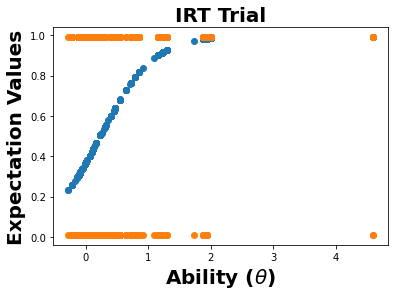

In [56]:
# Plotting Trial

Tough = DataSet[[0, 6, 57]]
rough = Tough.dropna(axis=0)

xs = rough[0].tolist()    # Theta Column
#print(xs)
ys = rough[6].tolist()    # CM411Q02S Column
#print(ys)
zs = rough[57].tolist()   # CM411Q02S Real df Column

plt.scatter(x=xs, y=ys)
plt.scatter(x=xs, y=zs)

plt.title('IRT Trial', fontdict={'weight': 'bold', 'size': 20})
plt.xlabel('Ability ('r'$\theta$'')', fontdict={'weight': 'bold', 'size': 20})
plt.ylabel('Expectation Values', fontdict={'weight': 'bold', 'size': 20})
plt.show()

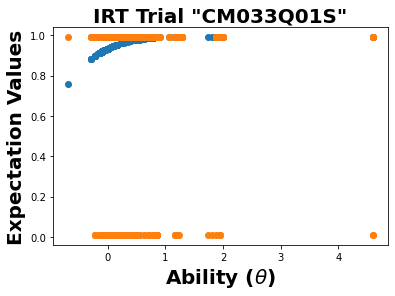

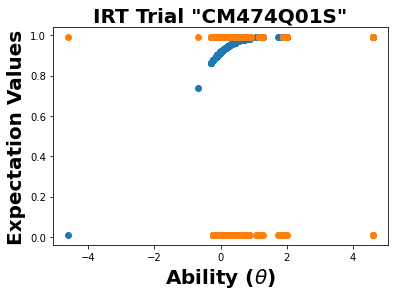

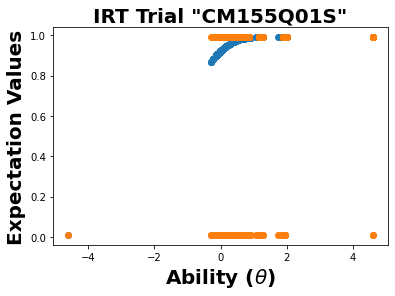

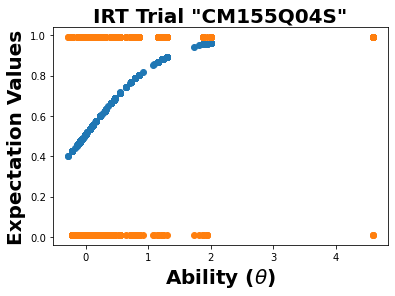

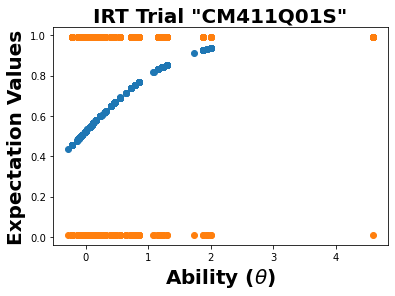

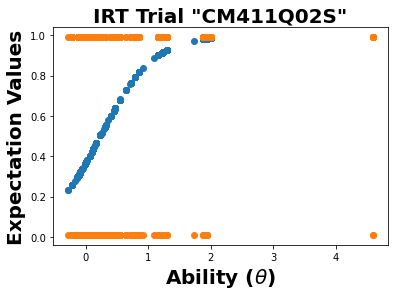

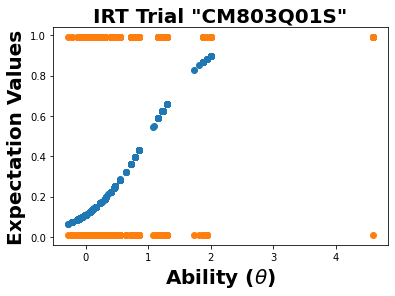

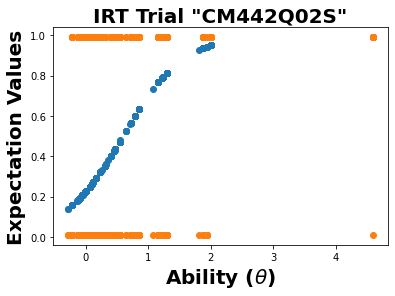

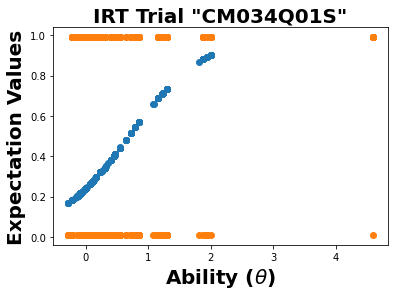

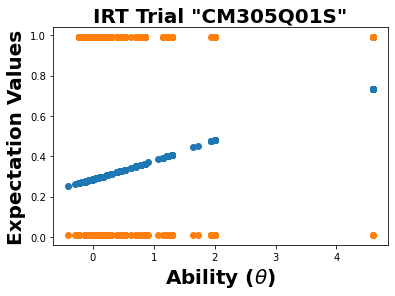

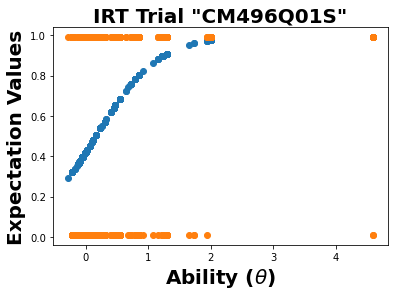

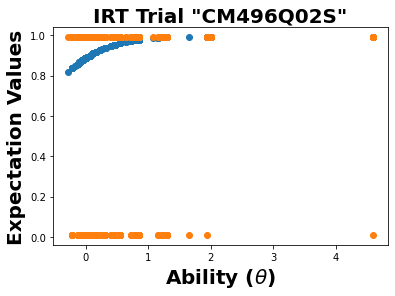

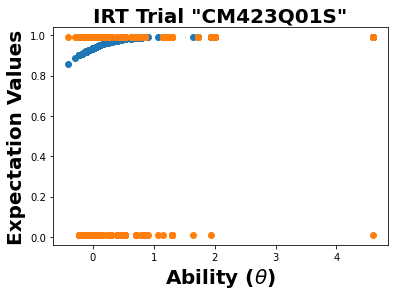

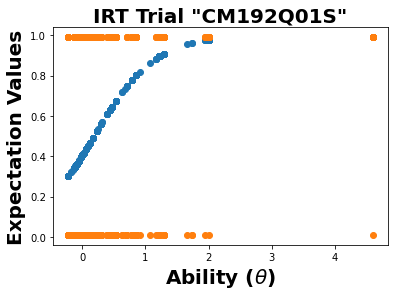

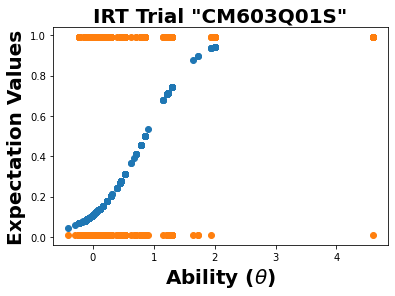

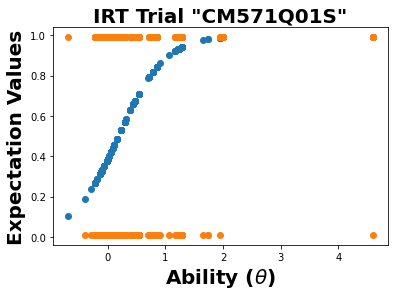

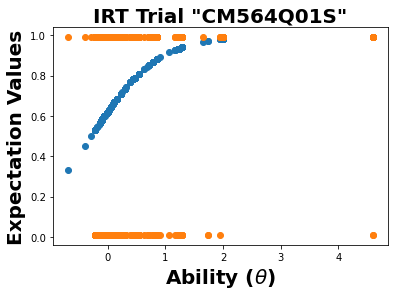

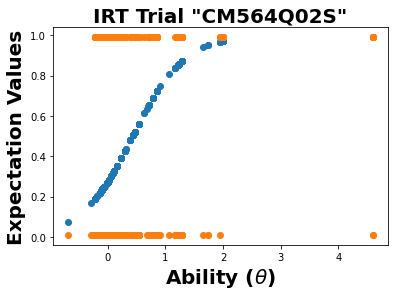

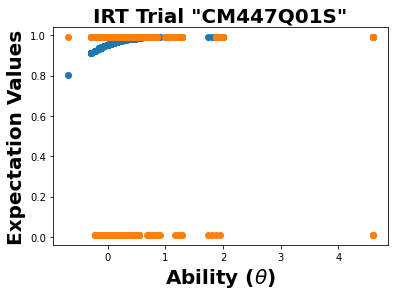

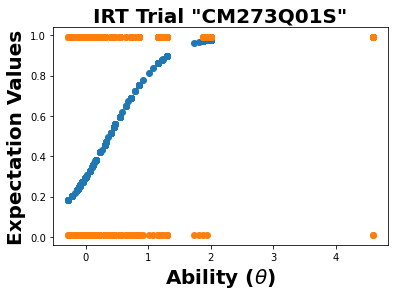

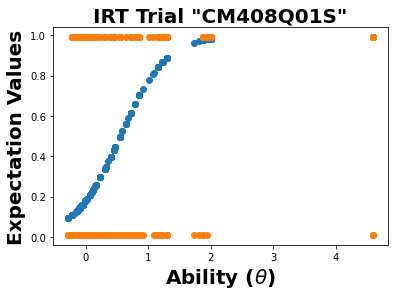

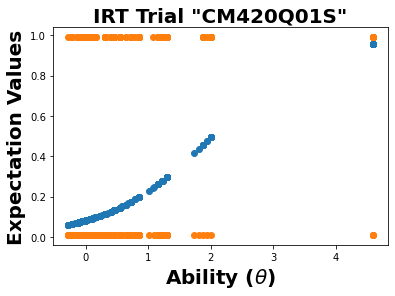

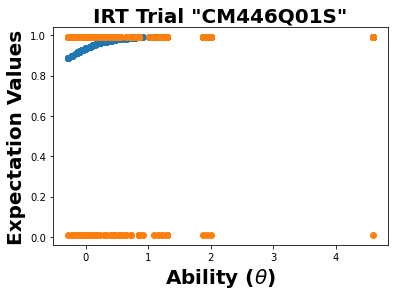

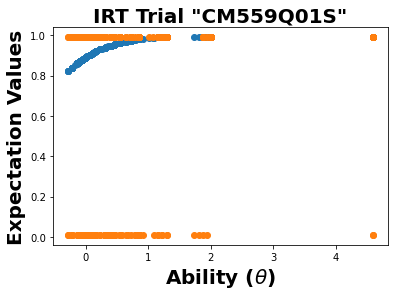

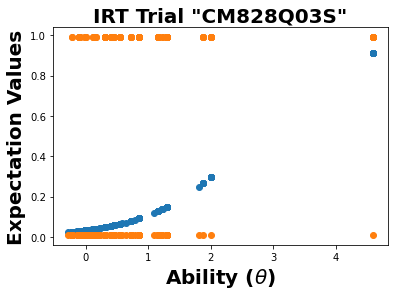

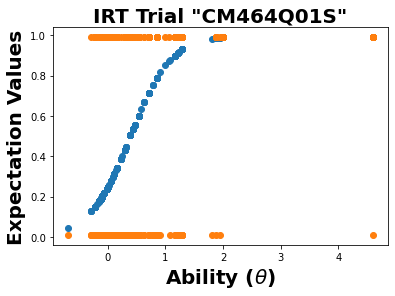

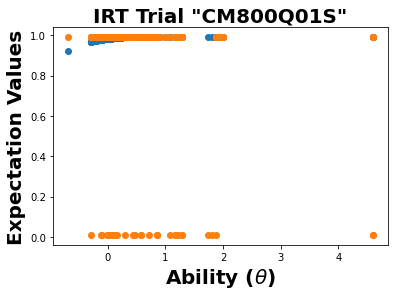

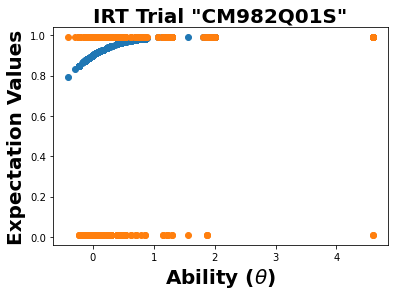

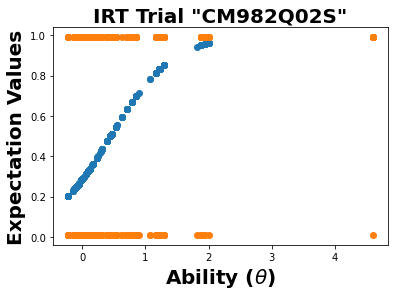

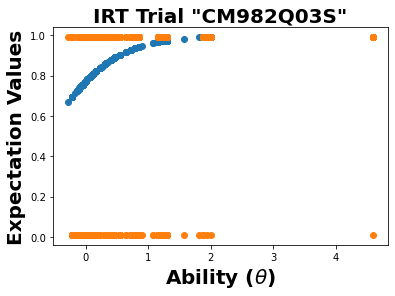

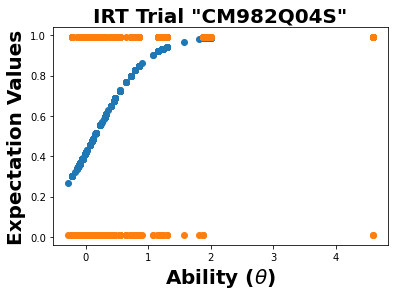

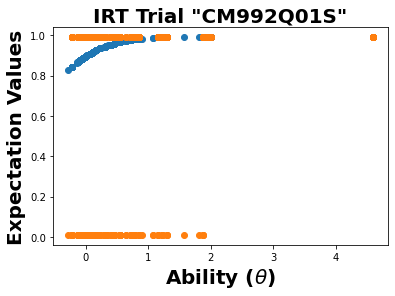

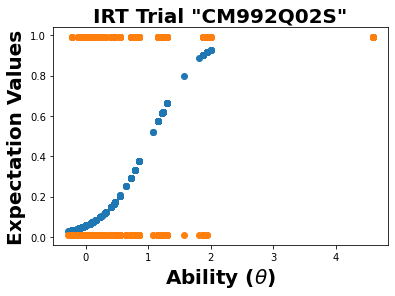

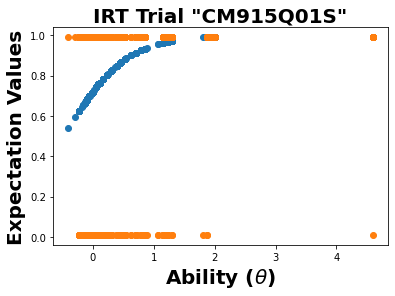

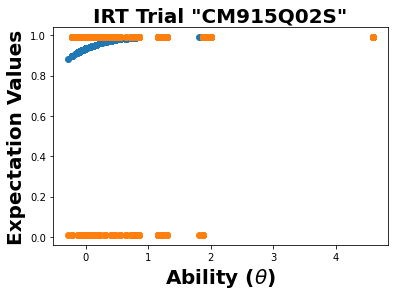

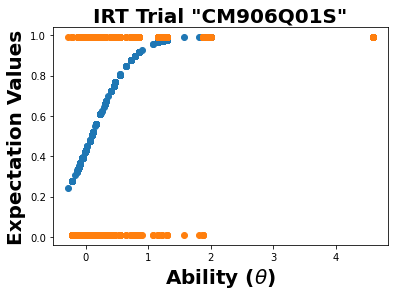

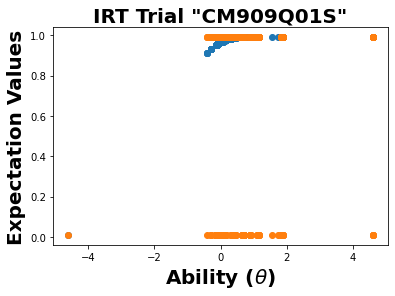

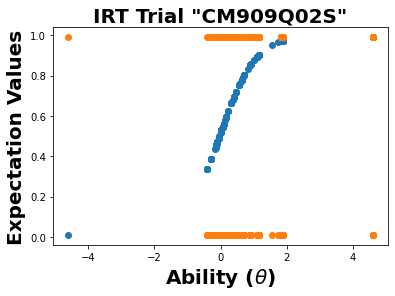

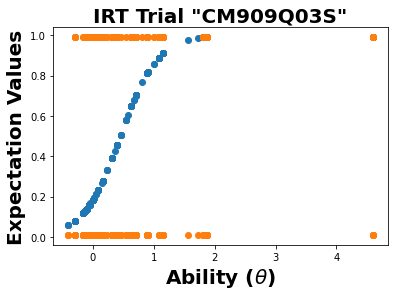

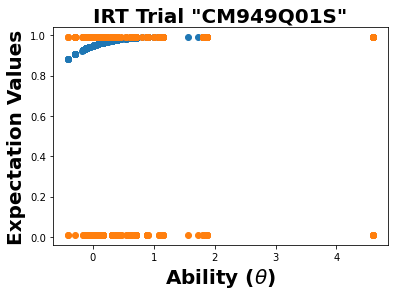

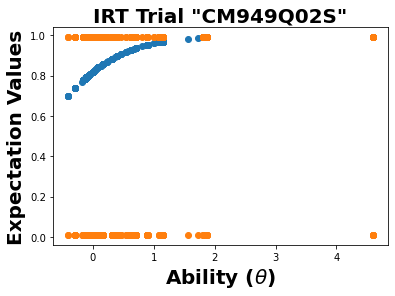

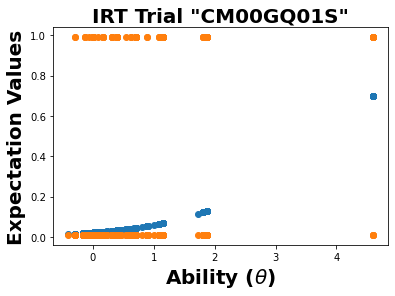

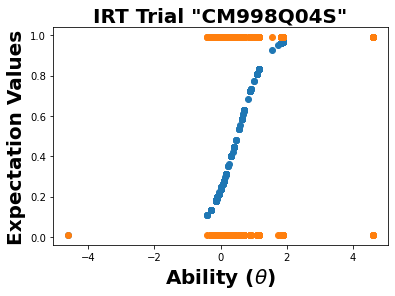

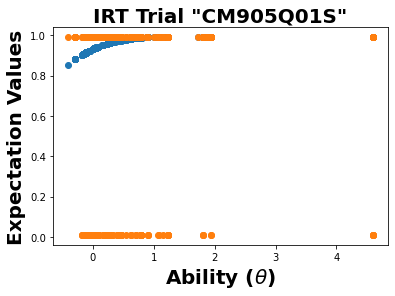

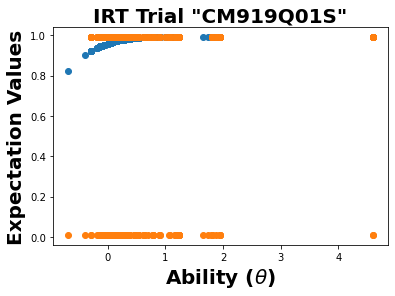

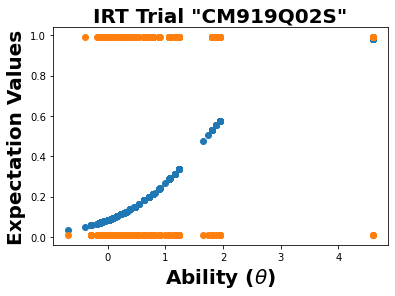

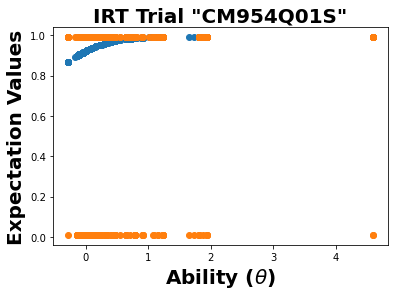

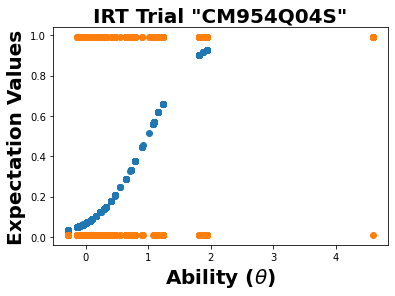

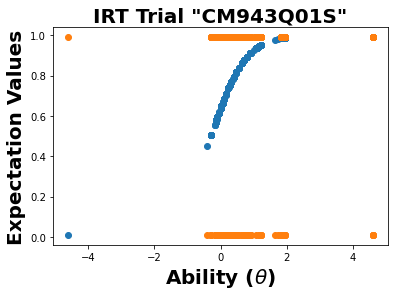

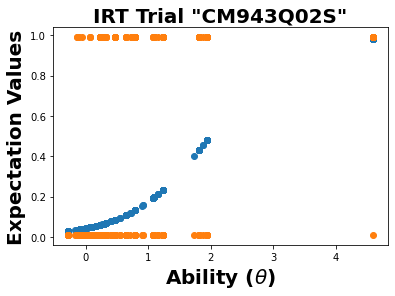

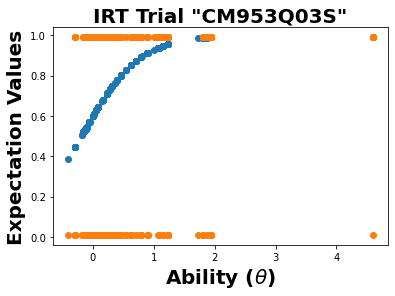

In [57]:
# Plotting Trial Multi Columns

xs = DataSet[0].tolist()
#print(xs)

for n in range(columcolum.shape[0]):
    Tough_in = DataSet[[0, n+1, n+52]]
    rough_in = Tough_in.dropna(axis=0)
    
    xs = rough_in[0].tolist()
    ys = rough_in[n+1].tolist()
    zs = rough_in[n+52].tolist()
    plt.scatter(x=xs, y=ys)
    plt.scatter(x=xs, y=zs)
    
    plt.title('IRT Trial "%s"' %columcolum[n], fontdict={'weight': 'bold', 'size': 20})
    plt.xlabel('Ability ('r'$\theta$'')', fontdict={'weight': 'bold', 'size': 20})
    plt.ylabel('Expectation Values', fontdict={'weight': 'bold', 'size': 20})
    plt.show()


In [58]:
alpha_2 = alpha_1.tolist()
#print(alpha_2)
print(alpha_2[0][1])
rank = 1
print(alpha_2[0][rank])
beta_2 = beta_1.tolist()
print(beta_2[0][2])

1.996069570929856
1.996069570929856
-1.1385586155340655


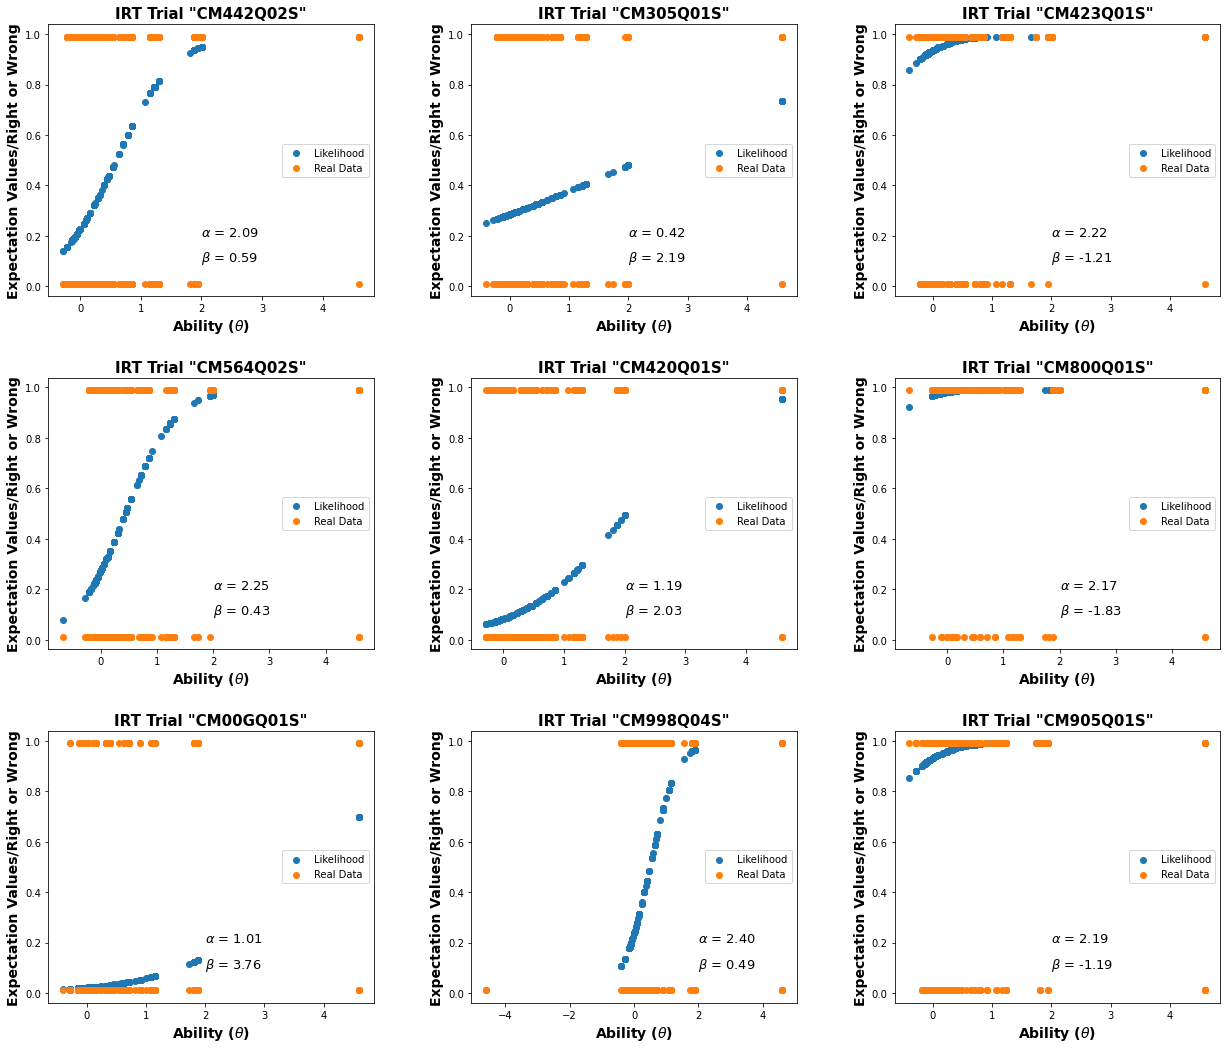

In [59]:
# 선별된 문항들 집중 분석 (likelihood 방식으로 잘된 것 1개, 찌그러진거 8개)

f, axes = plt.subplots(3, 3)
garo = 0
sero = 0
rank = 0

# 격자 크기 설정
f.set_size_inches((21, 18))

# 격자 여백 설정
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

# 선택받은 문항 번호
Liszt = [8, 10, 13, 18, 22, 27, 42, 43, 44]
    
for n in Liszt:
    Tough_fin = DataSet[[0, n, n+51]]
    rough_fin = Tough_fin.dropna(axis=0)
    rank = n - 1
    
    xs = rough_fin[0].tolist()
    ys = rough_fin[n].tolist()
    zs = rough_fin[n+51].tolist()
    axes[garo, sero].scatter(x=xs, y=ys, label='Likelihood')
    axes[garo, sero].scatter(x=xs, y=zs, label='Real Data')
    
    axes[garo, sero].set_title('IRT Trial "%s"' %columcolum[n-1], fontdict={'weight': 'bold', 'size': 15})
    axes[garo, sero].set_xlabel('Ability ('r'$\theta$'')', fontdict={'weight': 'bold', 'size': 14})
    axes[garo, sero].set_ylabel('Expectation Values/Right or Wrong', fontdict={'weight': 'bold', 'size': 14})
        
    axes[garo, sero].text(2, 0.2, r'$\alpha$ = {0:0.2f}'.format(alpha_2[0][rank]), size = 13)
    axes[garo, sero].text(2, 0.1, r'$\beta$ = {0:0.2f}'.format(beta_2[0][rank]), size = 13)
    
    axes[garo, sero].legend(loc='right')
    
    sero += 1
    garo += sero // 3
    sero = sero % 3


plt.show()

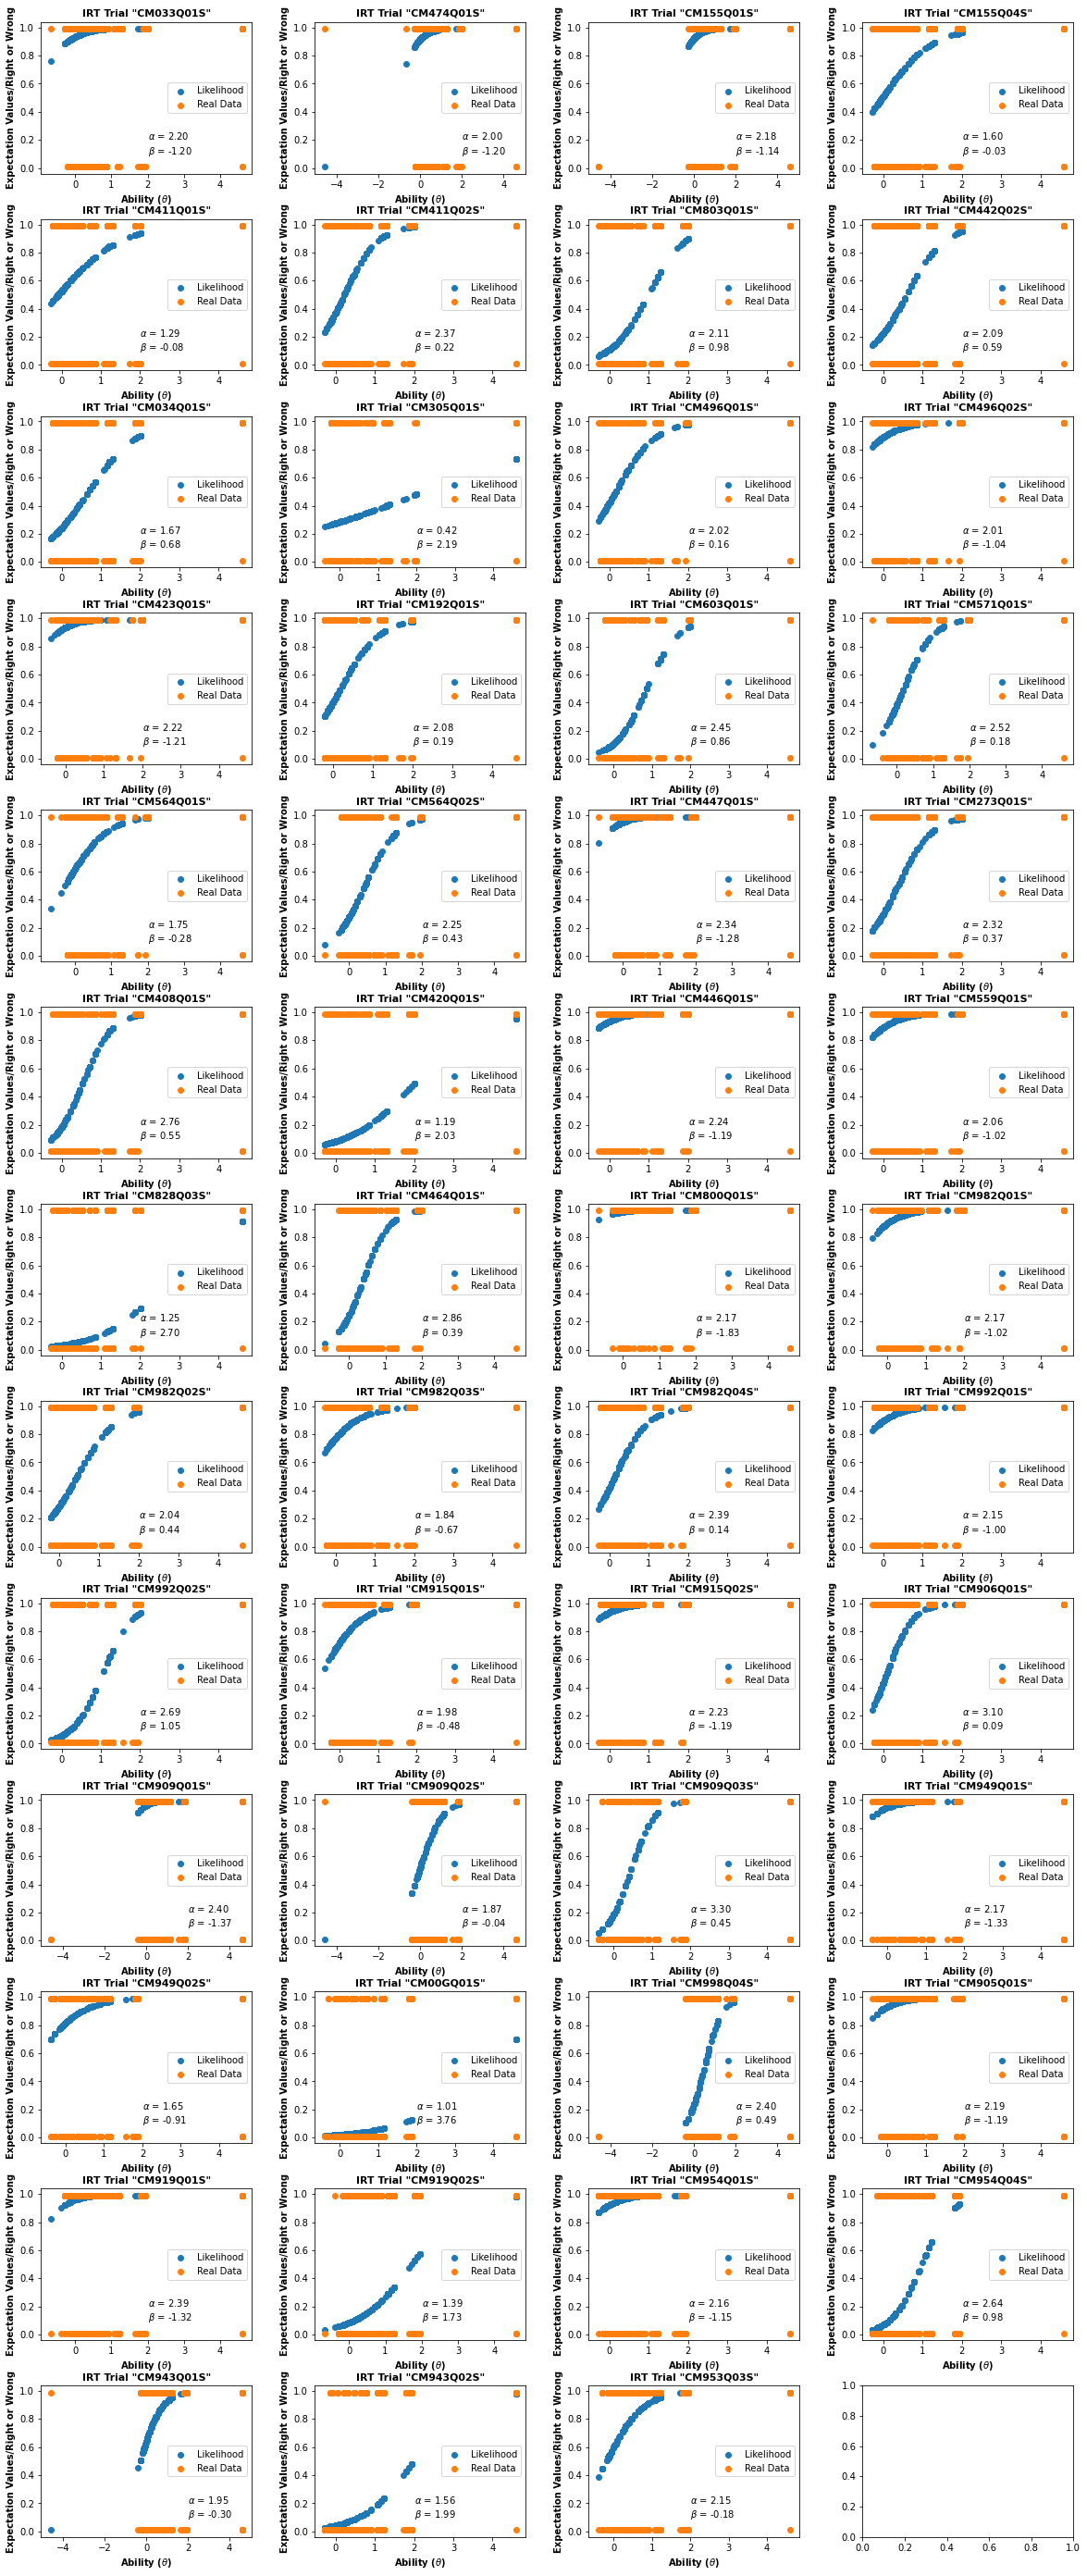

In [60]:
# 최종 plotting 결과를 격자 방식으로 나열
f, axes = plt.subplots(13, 4)
garo = 0
sero = 0
rank = 0

# 격자 크기 설정
f.set_size_inches((20, 50))

# 격자 여백 설정
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

# 놀고먹는 xs

# 격자 채워넣기

#start_16bit = columcolum.shape[0] // 16

#while start_16bit >= 0:
    
for n in range(columcolum.shape[0]):
    Tough_fin = DataSet[[0, n+1, n+52]]
    rough_fin = Tough_fin.dropna(axis=0)
    
    xs = rough_fin[0].tolist()
    ys = rough_fin[n+1].tolist()
    zs = rough_fin[n+52].tolist()
    axes[garo, sero].scatter(x=xs, y=ys, label='Likelihood')
    axes[garo, sero].scatter(x=xs, y=zs, label='Real Data')
    
    axes[garo, sero].set_title('IRT Trial "%s"' %columcolum[n], fontdict={'weight': 'bold', 'size': 11})
    axes[garo, sero].set_xlabel('Ability ('r'$\theta$'')', fontdict={'weight': 'bold', 'size': 10})
    axes[garo, sero].set_ylabel('Expectation Values/Right or Wrong', fontdict={'weight': 'bold', 'size': 10})
        
    axes[garo, sero].text(2, 0.2, r'$\alpha$ = {0:0.2f}'.format(alpha_2[0][rank]), size = 10)
    axes[garo, sero].text(2, 0.1, r'$\beta$ = {0:0.2f}'.format(beta_2[0][rank]), size = 10)
    
    axes[garo, sero].legend(loc='right')
    
    sero += 1
    garo += sero // 4
    sero = sero % 4
    rank += 1


plt.show()

In [34]:
alpha_given = pd.read_csv("alpha_LLH.csv")
print(alpha_given)

   Unnamed: 0         0         1         2         3         4         5  \
0           0  0.867762  0.760318  1.474832  1.183268  1.162131  0.791843   

          6         7         8  ...        41        42        43        44  \
0  2.134036  1.737991  1.227131  ...  1.364727  0.397955  0.788604  1.462591   

         45        46        47        48        49       50  
0  1.173064  2.008299  2.266966  1.052638  4.394977  4.40255  

[1 rows x 52 columns]


In [51]:
alpha_given_np = alpha_given.to_numpy()
print(alpha_given_np)

[[0.         0.86776156 0.76031788 1.47483164 1.18326835 1.16213118
  0.79184316 2.13403589 1.73799141 1.22713135 0.23739721 1.77817802
  1.29162022 0.70401757 1.39360318 1.14301926 1.93343658 0.77174787
  0.59612199 1.33204323 0.96843646 1.64767913 0.62176509 1.48655807
  1.5865448  2.11859663 2.17575241 2.52807673 0.70152564 0.90382973
  0.83647074 1.66032059 1.94300112 2.02680215 0.85282893 1.45082253
  1.79848715 2.19634927 2.53557957 7.47099204 1.42219341 1.55246785
  1.36472674 0.39795495 0.78860353 1.46259065 1.17306406 2.00829906
  2.26696612 1.05263783 4.39497709 4.40255023]]


In [71]:
alpha_trial = alpha_given_np[:,1:]
print(alpha_trial)

[[0.86776156 0.76031788 1.47483164 1.18326835 1.16213118 0.79184316
  2.13403589 1.73799141 1.22713135 0.23739721 1.77817802 1.29162022
  0.70401757 1.39360318 1.14301926 1.93343658 0.77174787 0.59612199
  1.33204323 0.96843646 1.64767913 0.62176509 1.48655807 1.5865448
  2.11859663 2.17575241 2.52807673 0.70152564 0.90382973 0.83647074
  1.66032059 1.94300112 2.02680215 0.85282893 1.45082253 1.79848715
  2.19634927 2.53557957 7.47099204 1.42219341 1.55246785 1.36472674
  0.39795495 0.78860353 1.46259065 1.17306406 2.00829906 2.26696612
  1.05263783 4.39497709 4.40255023]]


In [45]:
# 일단 엑셀 저장할 땐 transpose한 상태로 저장

w_test_T = np.transpose(w_test)
print(w_test_T)
theta_test_T = np.transpose(theta_test)
print(theta_test_T)

[[0.84670876 0.80669813 0.99546478 0.93034339 1.03354318 0.74933518
  1.36389188 1.18472091 0.98147496 0.55462249 1.26462409 1.21444498
  0.85917982 1.19072085 1.15072771 1.28194451 0.89512505 0.70628464
  0.74592638 0.98945351 1.19787732 0.61788893 1.07696422 1.0688934
  1.33144398 1.32521136 0.9305236  0.71346803 0.91889591 0.80997753
  1.07689654 0.86322185 1.39473146 0.74858522 0.84973903 1.07391056
  1.04470215 1.0967281  1.64300413 0.96487932 0.79694316 1.06592483
  0.64861259 0.70171496 1.09236883 0.74539068 1.06443488 0.99387055
  0.90427871 1.29686046 1.19682249]]
[[ 1.27517403  0.80401452  0.55451581 ...  1.09624128 -1.21364624
  -0.15392034]]


In [65]:
print(alpha_trial.shape)
print(alpha_trial.shape[1])

(1, 51)
51


In [46]:
alpha_trial_df = pd.DataFrame(alpha_test)
alpha_trial_df.to_csv("alpha_0.00065.csv")
beta_trial_df = pd.DataFrame(beta_test)
beta_trial_df.to_csv("beta_0.00065.csv")
w_test_T_df = pd.DataFrame(w_test_T)
w_test_T_df.to_csv("w_0.00065_T.csv")
theta_trial_df = pd.DataFrame(theta_test_T)
theta_trial_df.to_csv("theta_0.00065_T.csv")

In [195]:
print(theta_test_T.shape)
print(theta_65.shape)

(1, 2727)
(1, 2727)


In [61]:
theta_test_T = np.transpose(theta_test)
print(theta_test_T)
theta_trial_df = pd.DataFrame(theta_test_T)
theta_trial_df.to_csv("theta_700Q.csv")

[[ 0.71497718  0.16369791  0.05766303 ...  0.78777296  0.25076033
  -0.11542209]]


In [62]:
theta_65_df = pd.read_csv("theta_0.00065_T.csv")
theta_65_long = theta_65_df.to_numpy()
theta_65 = theta_65_long[:, 1:]
theta_65_compare = np.transpose(theta_65)

In [63]:
import matplotlib.pylab as pylab

In [64]:
x = theta_65[0, :]
y = theta_test_T[0, :]

In [65]:
z = np.polyfit(x, y, 1) # (X,Y,차원) 정의
p = np.poly1d(z) # 1차원 다항식에 대한 연산을 캡슐화


In [66]:
from sklearn.metrics import r2_score

In [67]:
R2 = r2_score(x, y)
print(R2)

0.03584678358884208


Text(2, -3, '$R^2$ =0.036')

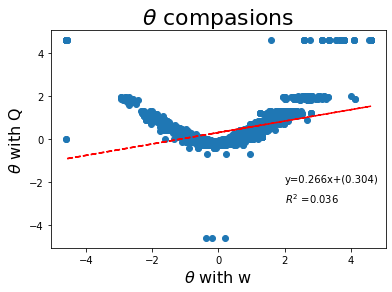

In [68]:
pylab.plot(x, y,'o')
pylab.plot(x,p(x),"r--")
pylab.xlabel(r'$\theta$' " with w", fontdict={'size': 16})
pylab.ylabel(r'$\theta$' " with Q", fontdict={'size': 16})
pylab.title(r'$\theta$' " compasions", fontdict={'size': 22})
pylab.text(2,-2, "y=%.3fx+(%.3f)"%(z[0],z[1]), fontdict={'size': 10})
pylab.text(2,-3, r'$R^2$'" =%.3f"% R2, fontdict={'size': 10})